In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
exams_df = pd.read_csv("exams.csv",
                      header=[0])
exams_df_no_outlier = exams_df.drop(6)
exams_df_no_outlier = exams_df_no_outlier.reset_index(drop=True)

In [3]:
X = exams_df[['midterm']]
y = exams_df[['final']]
X_no_out = exams_df_no_outlier[['midterm']]
y_no_out = exams_df_no_outlier[['final']]

In [4]:
X = X.to_numpy()
y = y.to_numpy()
X_no_out = X_no_out.to_numpy()
y_no_out = y_no_out.to_numpy()

In [5]:
sns.set_theme(style='darkgrid')

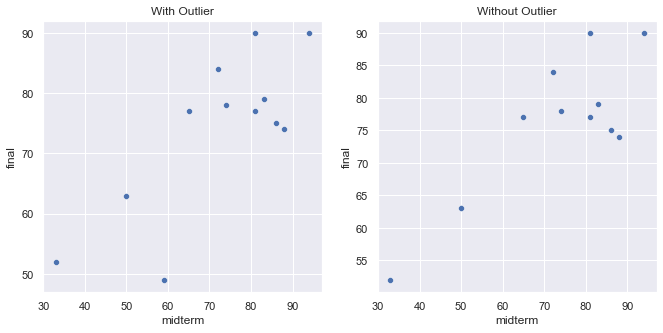

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, 
                               sharey=False,
                               figsize=(11,5))
sns.scatterplot(data=exams_df,
                x=exams_df['midterm'],
                y=exams_df['final'],
                ax=ax1).set(title='With Outlier')
sns.scatterplot(data=exams_df_no_outlier,
                x=exams_df_no_outlier['midterm'],
                y=exams_df_no_outlier['final'],
                ax=ax2).set(title='Without Outlier')
plt.show()

In [7]:
## model with outlier 
reg = LinearRegression().fit(X, y)
## model with outlier 
reg_no_out = LinearRegression().fit(X_no_out, y_no_out)

In [8]:
## Predicting final score of 86
score_86 = np.array([86])
score_86_finals = reg.predict(score_86.reshape(-1,1))
print('%.2f' % score_86_finals.item(0))

82.05


In [9]:
## Predicting final score of 86, no outlier
score_86_no_out = np.array([86])
score_86_finals_no_out = reg_no_out.predict(score_86_no_out.reshape(-1,1))
print('%.2f' % score_86_finals_no_out.item(0))

82.66


In [10]:
## Generating preidctions
y_pred = reg.predict(X)
y_pred_no_out = reg_no_out.predict(X_no_out)

In [11]:
## Method of least squares equation
y_intercept = '%.2f' % reg.intercept_
midterms_score = '%.2f' % reg.coef_[0]
print('Final Score = ' + y_intercept + ' + ' + midterms_score + 'x')

Final Score = 32.03 + 0.58x


In [12]:
## Method of least squares equation for no outlier
y_intercept_no_out = '%.2f' % reg_no_out.intercept_
midterms_score_no_out = '%.2f' % reg_no_out.coef_[0]
print('Final Score = ' + y_intercept_no_out + ' + ' + midterms_score_no_out + 'x')

Final Score = 39.22 + 0.51x


In [13]:
## With outlier final table
exams_pred_df = pd.concat([exams_df, pd.DataFrame(y_pred)],axis=1)
exams_pred_df.columns = ['midterm', 'final', 'predicted']

In [14]:
## Without outlier final table
exams_pred_df_no_out = pd.concat([exams_df_no_outlier, pd.DataFrame(y_pred_no_out)],axis=1)
exams_pred_df_no_out.columns = ['midterm', 'final', 'predicted']

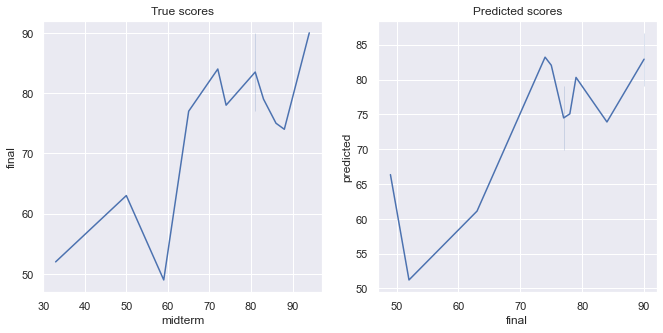

In [15]:
## With outlier
fig, (ax1, ax2) = plt.subplots(ncols=2, 
                               sharey=False,
                               figsize=(11,5))
sns.lineplot(data=exams_pred_df,
             x=exams_pred_df['midterm'],
             y=exams_pred_df['final'],
             ax=ax1).set(title='True scores')
sns.lineplot(data=exams_pred_df,
             x=exams_pred_df['final'],
             y=exams_pred_df['predicted'],
             ax=ax2).set(title='Predicted scores')
plt.show()

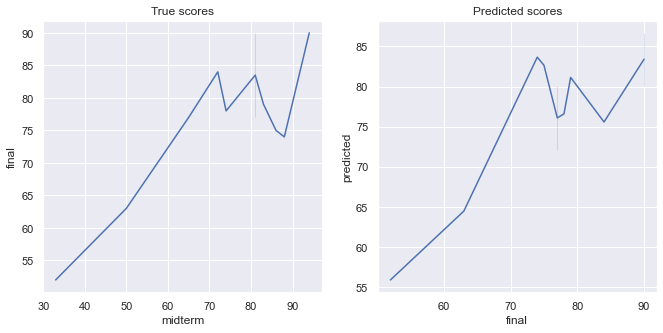

In [16]:
## Without Outiler
fig, (ax1, ax2) = plt.subplots(ncols=2, 
                               sharey=False,
                               figsize=(11,5))
sns.lineplot(data=exams_pred_df_no_out,
             x=exams_pred_df_no_out['midterm'],
             y=exams_pred_df_no_out['final'],
             ax=ax1).set(title='True scores')
sns.lineplot(data=exams_pred_df_no_out,
             x=exams_pred_df_no_out['final'],
             y=exams_pred_df_no_out['predicted'],
             ax=ax2).set(title='Predicted scores')
plt.show()

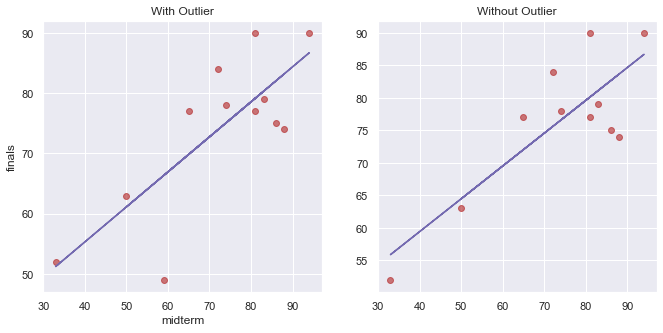

In [17]:
plt.figure(figsize=(11,5))

# 1 row, 2 column, plot 1
plt1 = plt.subplot(1, 2, 1)
plt.scatter(x=X, y=y, c="#B22222", alpha=0.6)
plt.plot(X,y_pred,"#746AB0")
plt1.set_title('With Outlier')

plt.ylabel('finals')
plt.xlabel('midterm')

# 1 row, 2 column, plot 2
plt2 = plt.subplot(1, 2, 2)
plt.scatter(x=X_no_out, y=y_no_out, c="#B22222", alpha=0.6)
plt.plot(X_no_out,y_pred_no_out,"#746AB0")
plt2.set_title('Without Outlier')

plt.show()